In [1]:
from climlab.solar.insolation import daily_insolation
import numpy as np
import matplotlib.pyplot as plt
degrad=np.pi/180
Lat=np.linspace(-85,85,18)
Days=np.linspace(0,60*60*24*365,101)
sol=daily_insolation(Lat,Days/60/60/24,S0=1366)
sol1=daily_insolation(Lat,Days/60/60/24,S0=1370)
print(sol[0,0],sol1[0,0])
plt.plot(Lat,sol[:,0])
Q=np.average(sol[:,0],weights=np.cos(Lat*degrad))
plt.plot(Lat,sol1[:,0])
Q1=np.average(sol1[:,0],weights=np.cos(Lat*degrad))
print(Q,Q1,Q-Q1)

553.4669075225116 555.0876012487855
353.39313737654163 354.4279635474832 -1.0348261709415851


(365, 18)


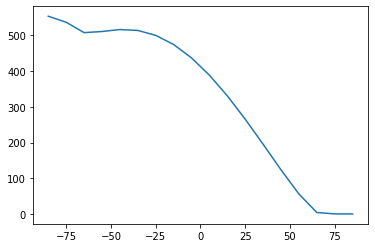

In [5]:
import xarray as xr

def insolation(Lat,Days,orb={'ecc': 0.017236, 'long_peri': 281.37, 'obliquity': 23.446},S0=1366.14):
    lat=xr.DataArray(Lat, coords=[Lat], dims=['lat'])
    day=xr.DataArray(Days, coords=[Days], dims=['day'])
    ecc = orb['ecc']
    long_peri = orb['long_peri']
    obliquity = orb['obliquity']

    phi=lat*degrad
    long_peri_rad = long_peri*degrad
    delta_lambda = (day - 80.) * 2*np.pi/365
    beta = np.sqrt(1-ecc**2)

    lambda_long_m = -2*((ecc/2 + (ecc**3)/8 ) * (1+beta) * np.sin(-long_peri_rad) -
            (ecc**2)/4 * (1/2 + beta) * np.sin(-2*long_peri_rad) + (ecc**3)/8 *
            (1/3 + beta) * np.sin(-3*long_peri_rad)) + delta_lambda

    lambda_long = ( lambda_long_m + (2*ecc - (ecc**3)/4)*np.sin(lambda_long_m - long_peri_rad) +
            (5/4)*(ecc**2) * np.sin(2*(lambda_long_m - long_peri_rad)) + (13/12)*(ecc**3)
    * np.sin(3*(lambda_long_m - long_peri_rad)) )

    delta = np.arcsin(np.sin(degrad*obliquity) * np.sin(lambda_long))

    Ho = xr.where( abs(delta)-np.pi/2+abs(phi) < 0.,np.arccos(-np.tan(phi)*np.tan(delta)),
                  xr.where(phi*delta>0., np.pi, 0. ))
    coszen = Ho*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(Ho)

    Fw = S0/np.pi*( (1+ecc*np.cos(lambda_long -degrad*long_peri))**2 / (1-ecc**2)**2 * coszen)
    
    return Fw
d=np.arange(365)
ins=insolation(Lat,d)
print(np.mean(np.shape(ins))
plt.plot(Lat,insolation(Lat,Days)[0])

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [14]:
configdic=importer('Development_config_1.ini')

variable_importer(configdic,False)

eq=configdic['eqparam']
rk=configdic['rk4input']
fun=configdic['funccomp']

outputdata=rk4alg(model_equation,eq,fun)

Loading Configuration from: Development_config_1.ini
0D
Starting simulation...
Simulation finished within 73.7575466632843 seconds


(0, 200)

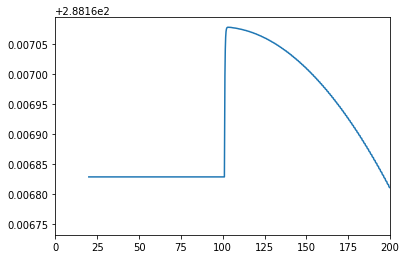

In [16]:
plt.plot(np.array(outputdata[0][(365*5):])/(60*60*24*365*10),outputdata[2][(365*5):])#,Vars.Read['solar'])
#print(Vars.solar)
#plt.ylim(341.85,341.86)
#plt.xlim(0,200)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [4]:
configdic=importer('Development_config_2.ini')

variable_importer(configdic,False)

eq=configdic['eqparam']
rk=configdic['rk4input']
fun=configdic['funccomp']

outputdata=rk4alg(model_equation,eq,fun)

Loading Configuration from: Development_config_2.ini
0D
Starting simulation...
Simulation finished within 33.98644542694092 seconds


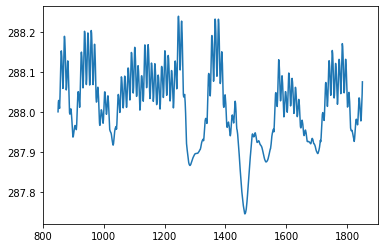

In [5]:
plt.plot(np.array(outputdata[0])/(60*60*24*365),outputdata[2])
#print(Vars.solar)
#print(Vars.ExternalInput[0][0]/(60*60*24*365))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars

In [6]:
configVKCTRL=importer('../../Simulations/Config/0D/Controls/TSI_VieiraKrivova_850_1850_CTRL.ini')
variable_importer(configVKCTRL,True,accuracy_number=1000,accuracy=1e-3)
CTRLVK=np.array(controlrun(configVKCTRL))

Loading Configuration from: ../../Simulations/Config/0D/Controls/TSI_VieiraKrivova_850_1850_CTRL.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
0D
Starting simulation...


Steady State reached after 1001 steps, within 0.14745545387268066 seconds

Simulation finished within 0.14938855171203613 seconds
Finished controlrun over 852.7424657534247 years. Runtime: 0.1717839241027832 s


In [7]:
configVK=importer('Dev_Data/TSI_VieiraKrivova_850_1850_new.ini')
variable_importer(configVK,False)
Vars.T,Vars.T_global=CTRLVK[1:,-1]
VK_time,VK_ZMT,VK_GMT=rk4alg(model_equation,configVK['eqparam'],configVK['funccomp'])

Loading Configuration from: Dev_Data/TSI_VieiraKrivova_850_1850_new.ini
0D
Starting simulation...



Simulation finished within 39.676400661468506 seconds


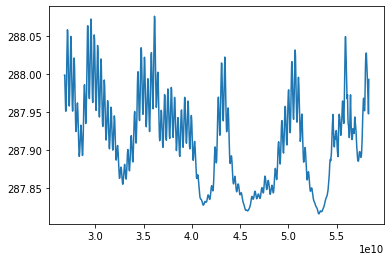

In [8]:
plt.plot(VK_time,VK_GMT)